# Advection Example

In [ ]:
# dependencies
using Pkg
Pkg.activate("./")
Pkg.instantiate()
Pkg.develop(path="../..")
using Plots
using LFAToolkit
using LinearAlgebra 

In [ ]:
# setup
p = 4
dimension = 2
mapping = hale_trefethen_strip_transformation(1.4)


mesh = []
if dimension == 1
   mesh = Mesh1D(1.0)
elseif dimension == 2
   mesh = Mesh2D(1.0, 1.0)
end

# operator
mass = GalleryOperator("mass", p + 1, p + 1, mesh, mapping = mapping)
advection = GalleryOperator("advection", p + 1, p + 1, mesh, mapping = mapping)

max eigenvalue: 9.931228362199418


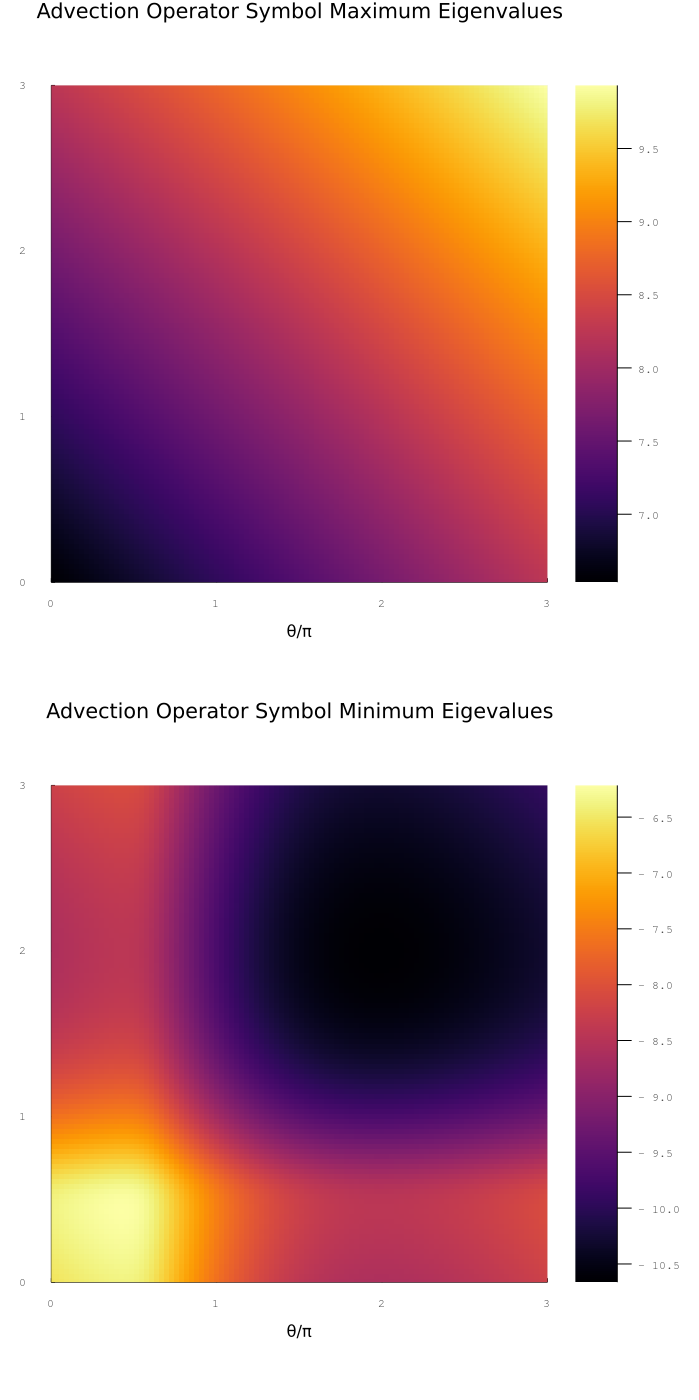

In [3]:
# compute full operator symbols
numbersteps = 100
maxeigenvalue = 0
θ_min = 0
θ_max = (p-1) * π
θ_range = LinRange(θ_min, θ_max, numbersteps)

# compute and plot smoothing factor
# -- 1D --
if dimension == 1
    # compute
    maxeigenvalues = zeros(numbersteps)
    mineigenvalues = zeros(numbersteps)
    for i in 1:numbersteps    
        θ = [θ_range[i]]
        A = computesymbols(advection, θ) * 2
        M = computesymbols(mass, θ)
        eigenvalues = hcat(sort(imag.(eigvals(-M\A)))...)'
        maxeigenvalues[i] = max(eigenvalues...)
        mineigenvalues[i] = min(eigenvalues...)
        maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i])
    end

    # plot
    println("max eigenvalue: ", maximum(maxeigenvalues))
    xrange = θ_range/π
    plot(
        xrange,
        xlabel="θ/π",
        xtickfont=font(12, "Courier"),
        [maxeigenvalues, mineigenvalues, π*xrange],
        ytickfont=font(12, "Courier"),
        ylabel="spectral radius",
        linewidth=3,
        label=["Maximum λ" "Minimum λ" "θ"],
        title="Advection Operator Symbol Maximal Eigenvalues"
    )
    ymin = minimum(mineigenvalues)
    ylims!(minimum([0, ymin * 1.1]), maximum(maxeigenvalues) * 1.1)
# -- 2D --
elseif dimension == 2
    # compute
    

    (_, eigenvalues, _) = computesymbolsoverrange(advection, numbersteps, mass=mass, θ_min = 0., θ_band = 1π)
    # Flip the sign because the weak form is the negative advection operator
    maxeigenvalues = reshape(maximum((-imag(eigenvalues)); dims=2), (numbersteps, numbersteps))
    mineigenvalues = reshape(minimum((-imag(eigenvalues)); dims=2), (numbersteps, numbersteps))

    # plot
    println("max eigenvalue: ", maximum(maxeigenvalues))
    xrange = θ_range/π
    plot1 = heatmap(
        xrange,
        xlabel="θ/π",
        xtickfont=font(12, "Courier"),
        xrange,
        ylabel="θ/π",
        maxeigenvalues,
        ytickfont=font(12, "Courier"),
        title="Advection Operator Symbol Maximum Eigenvalues",
        transpose=true,
        aspect_ratio=:equal
    )
    xlims!(θ_min/π, θ_max/π)
    ylims!(θ_min/π, θ_max/π)
    plot2 = heatmap(
        xrange,
        xlabel="θ/π",
        xtickfont=font(12, "Courier"),
        xrange,
        ylabel="θ/π",
        mineigenvalues,
        ytickfont=font(12, "Courier"),
        title="Advection Operator Symbol Minimum Eigevalues",
        transpose=true,
        aspect_ratio=:equal
    )
    xlims!(θ_min/π, θ_max/π)
    ylims!(θ_min/π, θ_max/π)
    plot!(plot1, plot2, layout = (2, 1), size = (700, 1400))
end